# MultiArm Bandit Problem (MAB)
The Multi-Armed Bandit (MAB) problem is a classic challenge in reinforcement learning. In this scenario, each slot machine represents a bandit with one lever (arm). Pulling the lever yields a reward according to a specific probability distribution. When dealing with just one slot machine, it is referred to as a one-armed bandit. When multiple slot machines are involved, it is termed a Multi-Armed Bandit (MAB) or k-armed bandit, where k indicates the number of slot machines.

## Epsilon Greedy Strategy
The epsilon greedy strategy addresses the challenge of 
Exploration vs Exploitation by using the following approach:
- **Exploitation**: With probability $1 - ϵ$, the algorithm selects the arm that currently
has the highest estimated reward. This is known as exploitation, as it leverages the 
current knowledge to maximize the reward.
- **Exploration**: With probability $ϵ$, the algorithm selects a random arm, regardless
of the current estimates. This is known as exploration, as it allows the algorithm
to gather more information about the reward distributions of all arms, which might lead
to discovering better options.

### importing the neccesary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parameter Declaration

In [2]:
# Parameters
k = 10  # Number of arms
# Probability of exploration
epsilons = [0.0, 0.1, 0.2, 1.0]
steps = 10000  # Number of steps

### MAB model 

In [3]:
class MultiArmedBandit:
    def __init__(self, k, epsilon, steps):
        self.k = k  # Number of arms
        self.epsilon = epsilon  # Probability of exploration
        self.steps = steps  # Number of steps
        self.q_true = np.random.randn(k)  # True reward distribution for each arm
        self.q_estimates = np.zeros(k)  # Estimated reward for each arm
        self.action_counts = np.zeros(k)  # Number of times each arm is pulled
        self.total_reward = 0  # Total reward accumulated
        self.average_rewards = np.zeros(steps)  # Average reward at each step

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.k)  # Exploration: random action
        else:
            return np.argmax(self.q_estimates)  # Exploitation: best current estimate

    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_counts[action]

    def step(self, step_num):
        action = self.select_action()
        reward = np.random.randn() + self.q_true[action]
        self.update_estimates(action, reward)
        self.total_reward += reward
        self.average_rewards[step_num] = self.total_reward / (step_num + 1)

    def run(self):
        for step in range(self.steps):
            self.step(step)
        return self.average_rewards    

### Plotting the model for multiple epsilons

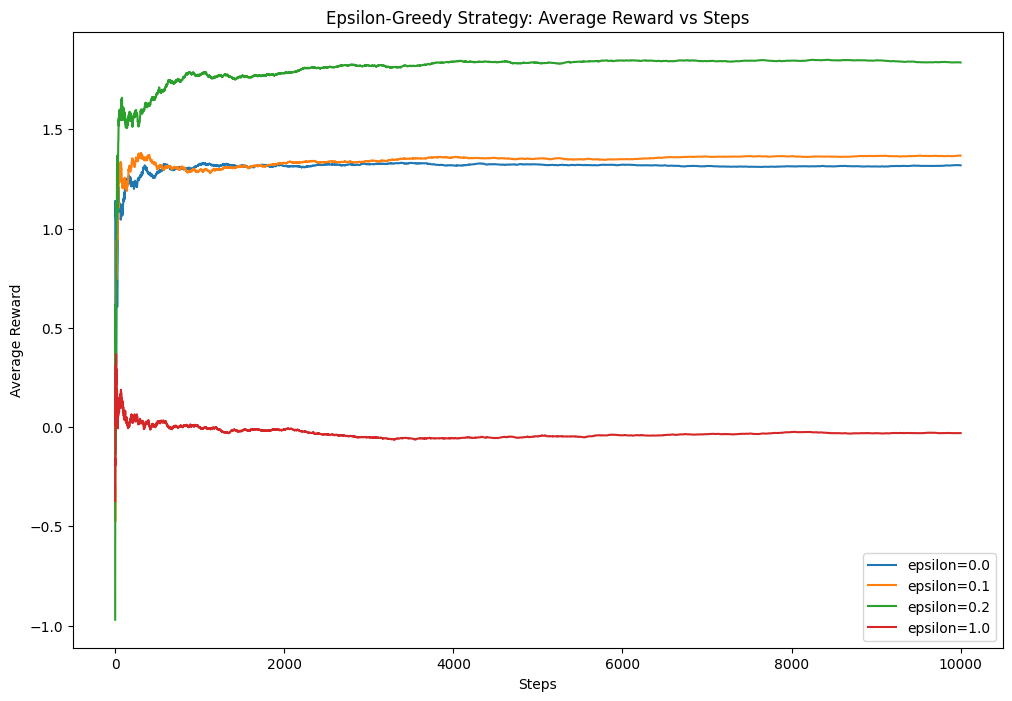

In [4]:
def plot_multiple_epsilons(epsilons, k = 10, steps = 1000):
    plt.figure(figsize = (12, 8))
    for epsilon in epsilons:
        mab = MultiArmedBandit(k, epsilon, steps)
        average_rewards = mab.run()
        if average_rewards is None or len(average_rewards) == 0:
            print(f"Error: Average rewards array is empty for epsilon={epsilon}")
        else:
            plt.plot(average_rewards, label=f'epsilon={epsilon}')
    
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Epsilon-Greedy Strategy: Average Reward vs Steps')
    plt.legend()
    plt.show()

# Plot the results for multiple epsilon values
plot_multiple_epsilons(epsilons, k, steps)